# Seattle Car Accident - Insurance Fraud

## Introduction/Business Problem

A car insurance company based in Seattle has recently uncovered a series of frauds in insurance claims. Individuals managed to get compensation for injuries, although only property was damaged in the accidents. Identifying such incidents is very time-consuming for the company because it requires a detailed analysis of the accident and medical reports. Consequently, the financial burden for the company is two-fold. It needs to invest in personnel to perform these checks randomly – because of limited resources - and to pay out compensation to possible scammers that were not identified in this process.  

The company requires an automated solution that allows it to focus only on the accidents that may not have led to personal injuries, but in which such were claimed. We will develop a solution for the customer that uses accident data and provides a prediction of the severity of the accident. The customer shall then use the solution to get a prediction of the severity of a new accident. If the severity of the claim and the prediction is a mismatch, the claim shall be flagged and forwarded to an insurance specialist. This shall allow the customer to reach the goal of only focusing on suspicious claims with the limited resources available to him. 

## Data

The company wants to use the data on accidents from the SDOT Traffic Management Division. The data can be downloaded [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv), and the meta-information for the data can be found [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
# Download data for use in notebook and read into a data frame
url = 'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
r = requests.get(url, allow_redirects=True)
open('Data-Collisions.csv', 'wb').write(r.content)

73917638

In [3]:
# Load data into a dataframe
df = pd.read_csv('Data-Collisions.csv', low_memory=False) 

In [4]:
# Expand display limit to show all columns of data frame
pd.options.display.max_columns = None
pd.options.display.max_rows = None

The data comes in a structure, tabular format with a sample per line and attributes/features per column. It is a combination of numerical and text values. The severity code - our attribute/feature of interest - is found in the very first column. From the meta-information awe see redundant information. The severity code exists two times (second time SEVERITYCODE.1). Also, the same information is provided in numerical format (SEVERITYCODE) and text format (SEVERITYDESC).  

Last but not least, there are some attributes that come from the data management system (ESRI), like INCKEY. These attributes do not provide any real meaning to the severity of an accident.

In [5]:
df.head()

SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY  \
0  Matched  Intersection  37475.0   
1  Matched         Block      NaN   
2  Matched         Block      NaN   
3  Matched         Block      NaN   
4  Matched  Intersection  34387.0   

                                      LOCATION EXCEPTRSNCODE EXCEPTRSNDESC  \
0                   5TH AVE NE AND NE 103RD ST                         NaN   
1   AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N           NaN           NaN   
2  4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST           NaN           NaN   
3     2ND AVE BETWEEN MARION ST AND MADISON ST                         NaN   
4              SWIFT AVE S AND SWIFT AV OFF RP           NaN           NaN   

   SEVERITYCODE.1                    SEVERITYDESC COLLISIONTYPE  PERSONCOUNT  \
0               2                Injury Collision        Angles            2   
1               1  Property Damage Only Collision     Sideswipe            2   
2               1  Property Damage Only Collision    Parked Car            4   
3               1  Property Damage Only Collision         Other            3   
4               2                Injury Collision        Angles            2   

   PEDCOUNT  PEDCYLCOUNT  VEHCOUNT                 INCDATE  \
0         0            0         2  2013/03/27 00:00:00+00   
1         0            0         2  2006/12/20 00:00:00+00   
2         0            0         3  2004/11/18 00:00:00+00   
3         0            0         3  2013/03/29 00:00:00+00   
4         0            0         2  2004/01/28 00:00:00+00   

                  INCDTTM                             JUNCTIONTYPE  \
0    3/27/2013 2:54:00 PM   At Intersection (intersection related)   
1   12/20/2006 6:55:00 PM  Mid-Block (not related to intersection)   
2  11/18/2004 10:20:00 AM  Mid-Block (not related to intersection)   
3    3/29/2013 9:26:00 AM  Mid-Block (not related to intersection)   
4    1/28/2004 8:04:00 AM   At Intersection (intersection related)   

   SDOT_COLCODE                                       SDOT_COLDESC  \
0            11  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...   
1            16  MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...   
2            14       MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END   
3            11  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...   
4            11  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...   

  INATTENTIONIND UNDERINFL   WEATHER ROADCOND                LIGHTCOND  \
0            NaN         N  Overcast      Wet                 Daylight   
1            NaN         0   Raining      Wet  Dark - Street Lights On   
2            NaN         0  Overcast      Dry                 Daylight   
3            NaN         N     Clear      Dry                 Daylight   
4            NaN         0   Raining      Wet                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0           NaN         NaN      NaN         10   
1           NaN   6354039.0      NaN         11   
2           NaN   4323031.0      NaN         32   
3           NaN         NaN      NaN         23   
4           NaN   4028032.0      NaN         10   

                                          ST_COLDESC  SEGLANEKEY  \
0                                  Entering at angle           0   
1  From same direction - both going straight - bo...           0   
2                             One parked--one moving           0   
3                   From same direction - all others           0   
4                                  Enterin

We have 194673 samples and 38 attributes. We see a mix of formats (int63, float64, object).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

Performing an initial statistical analysis we immediately see that **we are only having two severity codes (1 and 2)**, which correspond according to the meta-information to prop damage and injury respectively.

In [7]:
df.describe()

SEVERITYCODE              X              Y       OBJECTID  \
count  194673.000000  189339.000000  189339.000000  194673.000000   
mean        1.298901    -122.330518      47.619543  108479.364930   
std         0.457778       0.029976       0.056157   62649.722558   
min         1.000000    -122.419091      47.495573       1.000000   
25%         1.000000    -122.348673      47.575956   54267.000000   
50%         1.000000    -122.330224      47.615369  106912.000000   
75%         2.000000    -122.311937      47.663664  162272.000000   
max         2.000000    -122.238949      47.734142  219547.000000   

              INCKEY      COLDETKEY         INTKEY  SEVERITYCODE.1  \
count  194673.000000  194673.000000   65070.000000   194673.000000   
mean   141091.456350  141298.811381   37558.450576        1.298901   
std     86634.402737   86986.542110   51745.990273        0.457778   
min      1001.000000    1001.000000   23807.000000        1.000000   
25%     70383.000000   70383.000000   28667.000000        1.000000   
50%    123363.000000  123363.000000   29973.000000        1.000000   
75%    203319.000000  203459.000000   33973.000000        2.000000   
max    331454.000000  332954.000000  757580.000000        2.000000   

         PERSONCOUNT       PEDCOUNT    PEDCYLCOUNT       VEHCOUNT  \
count  194673.000000  194673.000000  194673.000000  194673.000000   
mean        2.444427       0.037139       0.028391       1.920780   
std         1.345929       0.198150       0.167413       0.631047   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       2.000000   
50%         2.000000       0.000000       0.000000       2.000000   
75%         3.000000       0.000000       0.000000       2.000000   
max        81.000000       6.000000       2.000000      12.000000   

        SDOT_COLCODE    SDOTCOLNUM     SEGLANEKEY  CROSSWALKKEY  
count  194673.000000  1.149360e+05  194673.000000  1.946730e+05  
mean       13.867768  7.972521e+06     269.401114  9.782452e+03  
std         6.868755  2.553533e+06    3315.776055  7.226926e+04  
min         0.000000  1.007024e+06       0.000000  0.000000e+00  
25%        11.000000  6.040015e+06       0.000000  0.000000e+00  
50%        13.000000  8.023022e+06       0.000000  0.000000e+00  
75%        14.000000  1.015501e+07       0.000000  0.000000e+00  
max        69.000000  1.307202e+07  525241.000000  5.239700e+06

Checking the dataset for NaN values reveals a large quanity present.

In [8]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

If we look at the distribution of the NaN value, we can see some dominant attributes, but also a correlation for different samples. Often, if a sample has a NaN value, e.g. in X or Y, than it will have further NaN values for othe attributes. This points to some specific accidents not being recorded properly.

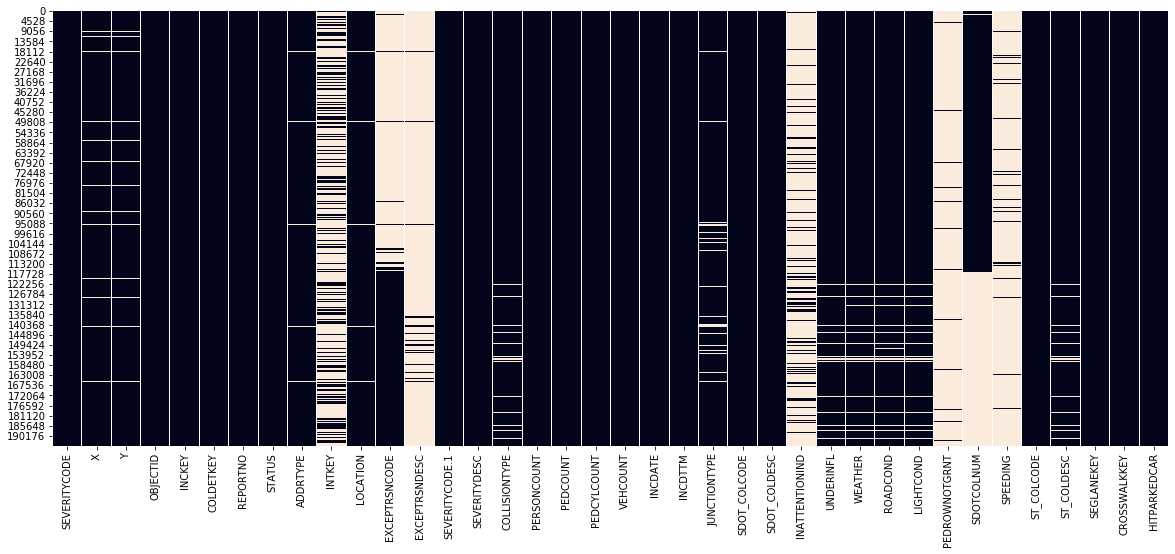

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize NaN values as head-map (binary)
plt.figure(figsize=(20,8))
sns.heatmap(df.isnull(), cbar=False)

### Data conclusion

We have a clearly structure dataset with meta-information to work on. Surprisingly the data has only two severity codes that shall be used for the remaining of the project. The data is mixed (numeric, text) and will need encoding in the later stage (machine learning) of the project. Also, there is a considerable amount of NaN values that shall be addressed in the next steps of the project. Overall, using the attributes as features (independent variable) and the severity code as the features (dependent variable) we shall proceed to developing the aforementioned solution.

## Methodology

### Initial data cleanup
We shall first start by cleaning up the data, by removing unneeded attributes and NaN values.

In [10]:
# Drop with unneeded meta-data from ESRI database
df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'REPORTNO', 'STATUS'], axis = 1, inplace = True) 
# Drop dublicate severicty code information
df.drop(['SEVERITYCODE.1', 'SEVERITYDESC'], axis = 1, inplace = True) 

In [11]:
# How many samples will we lose if we just remove all NaN
print('Total amples {} and samples with at least one NaN in attribute {}'.format(str(df.shape[0]), str(df.shape[0] - df.dropna().shape[0])))

Total amples 194673 and samples with at least one NaN in attribute 194673


We cannot simply drop the NaN. Instead lets first drop the dominant attributes that are full with NaN values and not suitable for any replacement method.

In [12]:
# Drop columns containing primarily NaN values
df.drop(['INTKEY', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING'], axis = 1, inplace = True) 

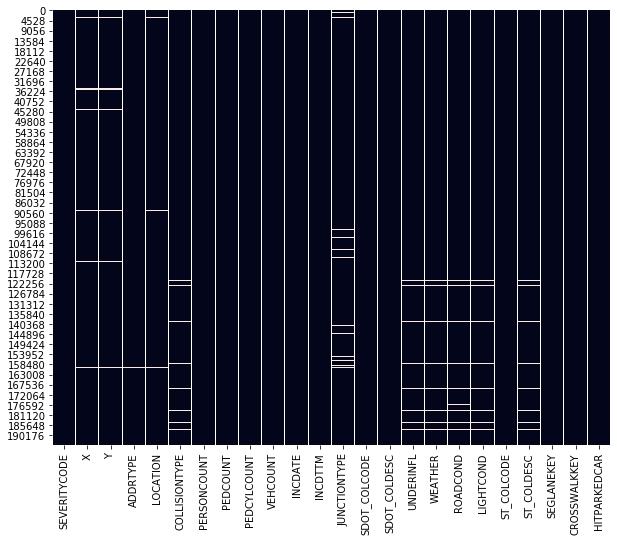

In [13]:
# Lets now recheck the distribution of NaN values 
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cbar=False)

Going back to our previous observation, we see patterns in NaN values, i.e., if a sample contains a NaN attribute, it is likely that it will contain further NaN as well. Let's examine now how the dataset will look like if we remove all NaN values, instead of replacing them.

In [14]:
print('Number of samples: {}'.format(str(df.shape[0])))
print('Number of samples w/o NaN: {}'.format(str(df.shape[0] - df.dropna().shape[0])))
print('Percentage of samples lost if we drop all NaN: {}'.format(str((df.shape[0] - df.dropna().shape[0])/df.shape[0])))

Number of samples: 194673
Number of samples w/o NaN: 14606
Percentage of samples lost if we drop all NaN: 0.07502838092596302


Droping 7.5% of the samples allows us to have a fully cleaned dataset, without any NaN and without using any replacement methods. This is preferable compared to a bias from the replacement of NaN values with for example mean, nearest value or most frequent value. It gives us the opportunity to use the data with higher confidence. Thus, at this point we drop all remaining NaNs.

In [15]:
# Drop remaining NaN values
df = df.dropna()
# Validate that we cleaned the dataset from NaN values
df.isnull().sum()

SEVERITYCODE     0
X                0
Y                0
ADDRTYPE         0
LOCATION         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
INCDATE          0
INCDTTM          0
JUNCTIONTYPE     0
SDOT_COLCODE     0
SDOT_COLDESC     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLCODE       0
ST_COLDESC       0
SEGLANEKEY       0
CROSSWALKKEY     0
HITPARKEDCAR     0
dtype: int64

### Data exploration

Before continuing we shall perform an exploratory data analysis, starting with common sense attributes. First, lets by examining if accidents have a geospatial correlation.

In [16]:
import math
import folium
from folium import plugins
from folium.plugins import HeatMap

# Rearrange GPS coordinates to have a folium heatmap
data = []
for lon, lat in zip(df.X.tolist(), df.Y.tolist()):
    if math.isnan(lon) or math.isnan(lat):
        continue
    
    data.append([lat, lon])

# Create folium heat map
m = folium.Map([df.Y.mean(), df.X.mean()], tiles='stamentoner', zoom_start=11)

HeatMap(data, radius = 12, min_opacity=0.3, blur=32).add_to(folium.FeatureGroup(name='Heat Map').add_to(m))
folium.LayerControl().add_to(m)

m

Zooming into the map we see some accident hot-spots on major roads and the downtown of Seattle. But nothing strikes us extraordinary. Lets continue our analysis, by examining the weather conditions under which accidents occur.

[Text(0, 0, 'Clear'),
 Text(0, 0, 'Raining'),
 Text(0, 0, 'Overcast'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Snowing'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Fog/Smog/Smoke'),
 Text(0, 0, 'Sleet/Hail/Freezing Rain'),
 Text(0, 0, 'Blowing Sand/Dirt'),
 Text(0, 0, 'Severe Crosswind'),
 Text(0, 0, 'Partly Cloudy')]

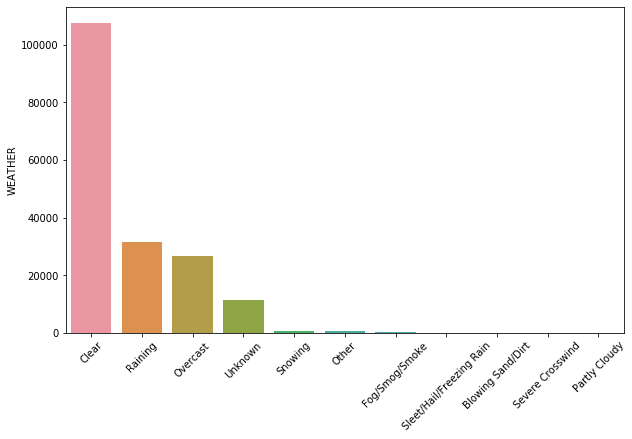

In [17]:
plt.figure(figsize=(10,6))
chart = sns.barplot(x=df['WEATHER'].value_counts().index, y=df['WEATHER'].value_counts())
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

Surprissingly, most accidents occur with perfectly fine weather. It would be interesting to correlate this with actual weather data from Seattle for the time the data was collected. Was the weather mostly clear in Seattle or rainny? If it was mostly rainny it would hint that drivers may have issues with sun glares on their wind shields. Although an interesting thought, it is outside the scope of this project and in regard with the data we use for this.

Now lets perform a similar analysis for the road and light conditions at the time of the accidents.

[Text(0, 0, 'Dry'),
 Text(0, 0, 'Wet'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Ice'),
 Text(0, 0, 'Snow/Slush'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Standing Water'),
 Text(0, 0, 'Sand/Mud/Dirt'),
 Text(0, 0, 'Oil')]

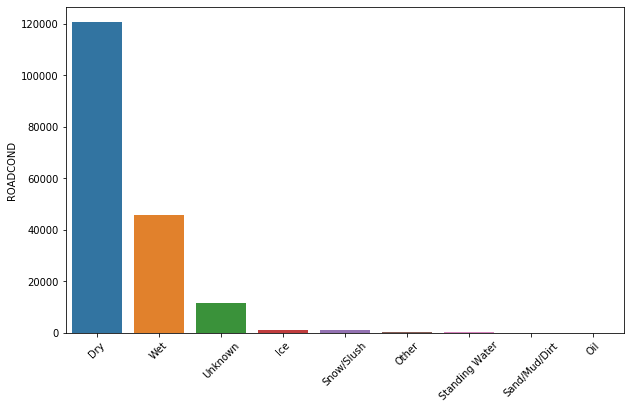

In [18]:
plt.figure(figsize=(10,6))
chart = sns.barplot(x=df['ROADCOND'].value_counts().index, y=df['ROADCOND'].value_counts())
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

We see that the road conditions correlated with the weather conditions (which is expected). Again, the surprissing thing is that road conditions were good when the accidents occured.

[Text(0, 0, 'Daylight'),
 Text(0, 0, 'Dark - Street Lights On'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Dusk'),
 Text(0, 0, 'Dawn'),
 Text(0, 0, 'Dark - No Street Lights'),
 Text(0, 0, 'Dark - Street Lights Off'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Dark - Unknown Lighting')]

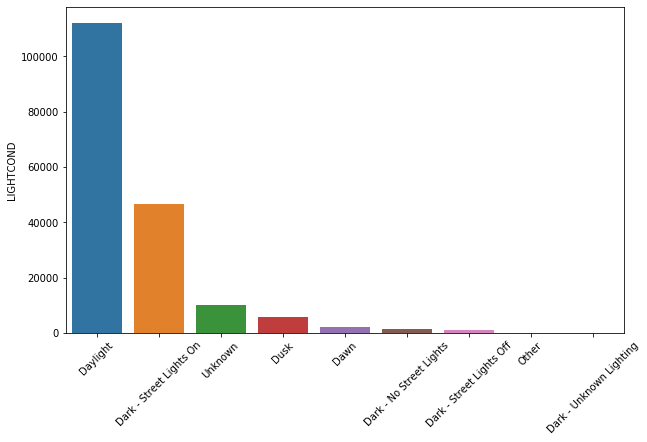

In [19]:
plt.figure(figsize=(10,6))
chart = sns.barplot(x=df['LIGHTCOND'].value_counts().index, y=df['LIGHTCOND'].value_counts())
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

The same goes for the light conditions. There was enough daylight or street lights when most of the accidents occured. 

We shall now examine the different inter-correlations of the attributes, but before we can do that, we need to encode the different attributes. 

### Data encoding and pre processing for machine learning

Before we start encoding, lets re-examine our dataset in more depth. For the modeling we can remove following columns (including reasoning):
- LOCATION: Because it is already encoded in the GPS coordinates (X,Y)
- INCDATE: Because or model needs to be used for future accidents and there needs to be invariante to date
- INCDTTM: Like for INCDATE
- SDOT_COLDESC: Because it is redundant information that is already available in an encoded form in SDOT_COLCODE
- ST_COLDESC: Because it is redundant information that is already available in an encoded form in ST_COLCODE

In [20]:
df.drop(['LOCATION', 'INCDATE', 'INCDTTM', 'SDOT_COLDESC', 'ST_COLDESC'], axis = 1, inplace = True) 
df.head()

SEVERITYCODE           X          Y      ADDRTYPE COLLISIONTYPE  \
0             2 -122.323148  47.703140  Intersection        Angles   
1             1 -122.347294  47.647172         Block     Sideswipe   
2             1 -122.334540  47.607871         Block    Parked Car   
3             1 -122.334803  47.604803         Block         Other   
4             2 -122.306426  47.545739  Intersection        Angles   

   PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  \
0            2         0            0         2   
1            2         0            0         2   
2            4         0            0         3   
3            3         0            0         3   
4            2         0            0         2   

                              JUNCTIONTYPE  SDOT_COLCODE UNDERINFL   WEATHER  \
0   At Intersection (intersection related)            11         N  Overcast   
1  Mid-Block (not related to intersection)            16         0   Raining   
2  Mid-Block (not related to intersection)            14         0  Overcast   
3  Mid-Block (not related to intersection)            11         N     Clear   
4   At Intersection (intersection related)            11         0   Raining   

  ROADCOND                LIGHTCOND ST_COLCODE  SEGLANEKEY  CROSSWALKKEY  \
0      Wet                 Daylight         10           0             0   
1      Wet  Dark - Street Lights On         11           0             0   
2      Dry                 Daylight         32           0             0   
3      Dry                 Daylight         23           0             0   
4      Wet                 Daylight         10           0             0   

  HITPARKEDCAR  
0            N  
1            N  
2            N  
3            N  
4            N

In [21]:
# Check uniqueness of attributes
for column in df:
    print(column, len(df[column].unique()))

SEVERITYCODE 2
X 23145
Y 23409
ADDRTYPE 2
COLLISIONTYPE 10
PERSONCOUNT 47
PEDCOUNT 7
PEDCYLCOUNT 3
VEHCOUNT 13
JUNCTIONTYPE 7
SDOT_COLCODE 39
UNDERINFL 4
WEATHER 11
ROADCOND 9
LIGHTCOND 9
ST_COLCODE 62
SEGLANEKEY 1919
CROSSWALKKEY 2169
HITPARKEDCAR 2


This leaves us with a cleaned dataset to start our encoding. We shall use categorical encoding for any non-numerical attributes. 

In [22]:
# Go through all columns that require encoding and perform it
cols_to_encode = ['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR', 'UNDERINFL', 'ST_COLCODE']
for c in cols_to_encode:
    df[c] = df[c].astype('category')
    df[c] = df[c].cat.codes

In [23]:
# Check type of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180067 entries, 0 to 194672
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SEVERITYCODE   180067 non-null  int64  
 1   X              180067 non-null  float64
 2   Y              180067 non-null  float64
 3   ADDRTYPE       180067 non-null  int8   
 4   COLLISIONTYPE  180067 non-null  int8   
 5   PERSONCOUNT    180067 non-null  int64  
 6   PEDCOUNT       180067 non-null  int64  
 7   PEDCYLCOUNT    180067 non-null  int64  
 8   VEHCOUNT       180067 non-null  int64  
 9   JUNCTIONTYPE   180067 non-null  int8   
 10  SDOT_COLCODE   180067 non-null  int64  
 11  UNDERINFL      180067 non-null  int8   
 12  WEATHER        180067 non-null  int8   
 13  ROADCOND       180067 non-null  int8   
 14  LIGHTCOND      180067 non-null  int8   
 15  ST_COLCODE     180067 non-null  int8   
 16  SEGLANEKEY     180067 non-null  int64  
 17  CROSSWALKKEY   180067 non-nul

At this point we can create a correlation analysis for all the attributes. We shall discuss this interesting result in the Discussion section of the report. 

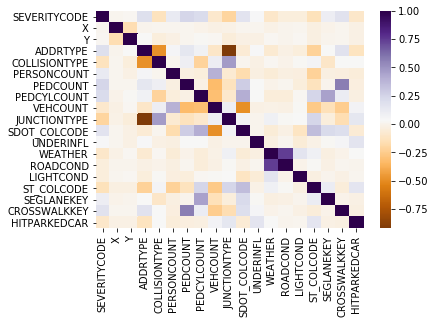

In [24]:
# df_new.head()
sns.heatmap(df.corr(),cmap="PuOr")

## Machine learning
The goal of this project was to create a solution that can use accident data and predict the severity of the accident (1: prop damage, 2: injury). This is a supervised classification problem. We will use the severity code as our dependent variable and all the attributes that remained after our cleanup as independent variables. 

### Data preperation
Before evaluating the algorithms, we shall examine the statistics of the dataset after having done all aforementioned steps.

In [25]:
df.describe()

SEVERITYCODE              X              Y       ADDRTYPE  \
count  180067.000000  180067.000000  180067.000000  180067.000000   
mean        1.309935    -122.330462      47.619501       0.349770   
std         0.462468       0.029977       0.056331       0.476898   
min         1.000000    -122.419091      47.495573       0.000000   
25%         1.000000    -122.348640      47.575576       0.000000   
50%         1.000000    -122.330168      47.615282       0.000000   
75%         2.000000    -122.311926      47.663939       1.000000   
max         2.000000    -122.238949      47.734142       1.000000   

       COLLISIONTYPE    PERSONCOUNT       PEDCOUNT    PEDCYLCOUNT  \
count  180067.000000  180067.000000  180067.000000  180067.000000   
mean        4.467259       2.479405       0.039413       0.030144   
std         2.824588       1.369008       0.204023       0.172311   
min         0.000000       0.000000       0.000000       0.000000   
25%         3.000000       2.000000       0.000000       0.000000   
50%         5.000000       2.000000       0.000000       0.000000   
75%         7.000000       3.000000       0.000000       0.000000   
max         9.000000      81.000000       6.000000       2.000000   

            VEHCOUNT   JUNCTIONTYPE   SDOT_COLCODE      UNDERINFL  \
count  180067.000000  180067.000000  180067.000000  180067.000000   
mean        1.974498       2.702644      14.323891       1.144946   
std         0.560060       1.377250       6.462207       1.019679   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       1.000000      11.000000       0.000000   
50%         2.000000       3.000000      13.000000       2.000000   
75%         2.000000       4.000000      14.000000       2.000000   
max        12.000000       6.000000      69.000000       3.000000   

             WEATHER       ROADCOND      LIGHTCOND     ST_COLCODE  \
count  180067.000000  180067.000000  180067.000000  180067.000000   
mean        2.957444       2.508872       4.350253      14.875818   
std         2.730150       3.630853       1.665606      12.688393   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       2.000000       3.000000   
50%         1.000000       0.000000       5.000000       8.000000   
75%         4.000000       8.000000       5.000000      26.000000   
max        10.000000       8.000000       8.000000      61.000000   

          SEGLANEKEY  CROSSWALKKEY   HITPARKEDCAR  
count  180067.000000  1.800670e+05  180067.000000  
mean      283.441658  1.035268e+04       0.031549  
std      3414.936194  7.431711e+04       0.174798  
min         0.000000  0.000000e+00       0.000000  
25%         0.000000  0.000000e+00       0.000000  
50%         0.000000  0.000000e+00       0.000000  
75%         0.000000  0.000000e+00       0.000000  
max    525241.000000  5.239700e+06       1.000000

Many values have a large range and standard distribution. It would be appropriate to perform a feature normalization in order to seemlessly use the data with different classifiers, to find the best one.  

An additional important point of consideration is the **balance of samples**. Our solution is focused on Severity Code 2, i.e. injury. How is the dataset balanced?

In [26]:

df['SEVERITYCODE'].value_counts()

1    124258
2     55809
Name: SEVERITYCODE, dtype: int64

### Rebalance dataset
We see that severity code 2 is under represented in the dataset. For that, we choose to resample with replacement, in order to avoid losing data. We will resample sample from severity code 2, to match the number of samples with severity code 1.

In [28]:
# Divide classes
df_class_1 = df.loc[df['SEVERITYCODE'] == 1]
df_class_2 = df.loc[df['SEVERITYCODE'] == 2]

# Oversample
count_class_1, count_class_2 = df[df.columns[0]].value_counts()
df_class_2_over = df_class_2.sample(count_class_1, replace=True)
# Create new balanced dataset
df_over = pd.concat([df_class_1, df_class_2_over], axis=0)
# Validate balance of dataset
count_class_1, count_class_2 = df_over[df_over.columns[0]].value_counts()
print(count_class_1, count_class_2)
df = df_over

124258 124258


In [29]:
# Split the data into train and test set
from sklearn.model_selection import train_test_split
# 20% go to test, 80% to train
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:]], df[df.columns[0]], test_size=0.20, random_state=0)

# Normalize the attributes/features
from sklearn import preprocessing
X_train_standardized = preprocessing.scale(X_train)
X_test_standardized = preprocessing.scale(X_test)

### Evaluate different classifiers

We will use the 'f1 score' that combines both precision and recall. We want to avoid just having a classifier with high precision or accuracy, because we are also keen in reducing the number of false-positives to reduce the effort on human resources for the insurance company.

In [30]:
from sklearn.metrics import f1_score
classifier_performance = {}

In [31]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_standardized, y_train)
y_pred = clf.predict(X_test_standardized)
classifier_performance['LogRegression'] = f1_score(y_test, y_pred)

In [32]:
# k-nearest neighbors
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid().fit(X_train, y_train)
y_pred = clf.predict(X_test)
classifier_performance['k-Nearest'] = f1_score(y_test, y_pred)

In [33]:
from sklearn import tree
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
classifier_performance['DecisionTree'] = f1_score(y_test, y_pred)

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)
y_pred = clf.predict(X_test)
classifier_performance['RandomForest'] = f1_score(y_test, y_pred)

In [35]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50).fit(X_train_standardized, y_train)
y_pred = clf.predict(X_test_standardized)
classifier_performance['AdaBoost'] = f1_score(y_test, y_pred)

In [36]:
df_classifiers = pd.DataFrame.from_dict(classifier_performance, orient='index')
df_classifiers.columns=['F1-Score']
df_classifiers

F1-Score
LogRegression  0.678126
k-Nearest      0.680047
DecisionTree   0.814420
RandomForest   0.843272
AdaBoost       0.693114

### Cross validation
The initial evaluation did not provide a clear winning classifier. Intensifying search with cross validation:

In [37]:
# Prepare data for cross validation
# No need to split into train and test, because it is performed for each fold in the cross-validation
X_std = preprocessing.scale(df[df.columns[1:]])
y = df[df.columns[0]]
classifier_cv = {}

In [38]:
# Logistic regression
from sklearn.model_selection import cross_val_score
import numpy as np
clf = LogisticRegression(random_state=0).fit(X_train_standardized, y_train)
scores = cross_val_score(clf, X_std, y, cv=5, scoring='f1')
# Add mean of f1 scores of cross validation
scores = np.append (scores, np.mean(scores))
classifier_cv['LogRegression'] = scores

In [39]:
# Nearest neighbor
clf = NearestCentroid().fit(X_train_standardized, y_train)
scores = cross_val_score(clf, X_std, y, cv=5, scoring='f1')
scores = np.append (scores, np.mean(scores))
classifier_cv['k-Nearest'] = scores

In [40]:
# Decision tree
clf = tree.DecisionTreeClassifier().fit(X_train_standardized, y_train)
scores = cross_val_score(clf, X_std, y, cv=5, scoring='f1')
scores = np.append (scores, np.mean(scores))
classifier_cv['DecisionTree'] = scores

In [41]:
# Random forest
clf = RandomForestClassifier(n_estimators=50).fit(X_train_standardized, y_train)
scores = cross_val_score(clf, X_std, y, cv=5, scoring='f1')
scores = np.append (scores, np.mean(scores))
classifier_cv['RandomForest'] = scores

In [42]:
# AdaBoost
clf = AdaBoostClassifier(n_estimators=50).fit(X_train_standardized, y_train)
scores = cross_val_score(clf, X_std, y, cv=5, scoring='f1')
scores = np.append (scores, np.mean(scores))
classifier_cv['AdaBoost'] = scores

## Results
We trained different algorithms. Initially, there was no clear distinction, which classifier performed best. Consequently, we performed a second run with cross-validation.

In [43]:
df_classifiers = pd.DataFrame.from_dict(classifier_cv, orient='index')
df_classifiers.columns=['F1 CV1', 'F1 CV2', 'F1 CV3', 'F1 CV4', 'F1 CV5', 'F1 Mean']
df_classifiers

F1 CV1    F1 CV2    F1 CV3    F1 CV4    F1 CV5   F1 Mean
LogRegression  0.621905  0.629999  0.657103  0.596402  0.568542  0.614790
k-Nearest      0.667016  0.673587  0.651130  0.655839  0.616524  0.652819
DecisionTree   0.797407  0.800289  0.811704  0.784223  0.749903  0.788705
RandomForest   0.809571  0.812837  0.831216  0.804818  0.762119  0.804112
AdaBoost       0.646837  0.655232  0.678198  0.615788  0.553502  0.629912

From the analysis we see that **Random Forest was the algorithm of choice for the problem**.  We can now perform a final analysis using a training for the Logistic Regression classifier and getting reports.

In [53]:
# Final training of best classifier
from sklearn.metrics import classification_report
clf = RandomForestClassifier(n_estimators=50).fit(X_train_standardized, y_train)
y_pred = clf.predict(X_test_standardized)

In [54]:
# Create a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.82      0.85     24909
           2       0.83      0.90      0.86     24795

    accuracy                           0.86     49704
   macro avg       0.86      0.86      0.86     49704
weighted avg       0.86      0.86      0.86     49704



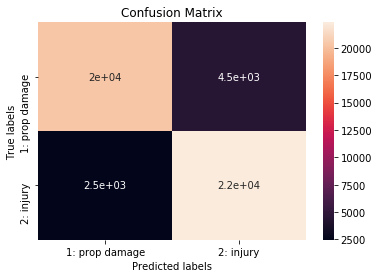

In [55]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1: prop damage', '2: injury']); ax.yaxis.set_ticklabels(['1: prop damage', '2: injury']);

## Discussion
### Observations

During the data preperations we found different attributes/columns in the dataset that were not useful for an analysis, because:
- The information was redundant
- The information was sparsingly available (many NaN values for some columns
- For the dependent variable (SEVERITYCODE) the dataset is unbalanced, i.e. SEVERITY CODE 2 - which is of highest interest to the insurance company - is underrepresented in the dataset.

After cleaning up the data we started an exploratory analysis on common sense reason for accidents, including:
- Geospatial hot-spot analysis
- Correlation with weather, road and light conditions

The geospatial analysis showed an increased number of accidents happening on major roads and in the city center, which would be something expected.

The weather and road conditions were - as expected - highly correlated. However, the surprise in the analysis was that the majority accidents happened during good weather conditions and with daily or street lights. The reasons may be manifold:
- Most of the traffic may indeed happen during daytime
- Seattle might be a city with limited rainfall
- A bright sun may affect the vision of drivers

In the later correlational analysis - after the encoding - we confirmed the correlation of weather and road conditions. Also, following correlations were observed:
- The collision type depends on the junction type
- The number of pedestrians involved in the accident depends on the crosswalk key



### Results

We early on cleaned the data and identified the meaninful attributes in the dataset. Also, we specifically removed the data and date-time attributes from the dataset. The rational behind this is that the insurance company will use accident data from the future, not the past, with the solution we provide. Also, any seasonal weather and road conditions as well as light conditions are explicitly avaiable in the dataset and do not need to be implicitly derived from the date.

In the results section we evaluated different classifiers. To make sure that we select a good classifier, we performed additional cross-validation. 

**The final solution achieved following results**

| Severity code   | Precision | Recall | F1- Score |
|-----------------|-----------|--------|-----------|
| 1 - prop damage | 89%       | 82%    | 85%       |
| 2 - injury      | 83%       | 90%    | 86%       |
|                 |           |        |           |

The recall is of special importance for severity code 2. In a previous solution we did not balance the dataset and got a much lower recall. This was also obvious in the confusion matrix. A high recall is necessary to all focusing personnel from the insurance company on cases with severity code 2. 

### Recommendations

To further confirm the effectiveness of the solution, we suggest to the insurance company to roll-out the model, by analyzinig incoming accident claims with the processes at work. After the model has been evaluated in deployment we can re-iterate to improve it further or use it in a more automated way in the company.

We also mentioned the interesting finding aboutthe correlation between the number of pedestrians involved in an accident and the key for the crosswalk. This suggests that at specific crosswalks we have a higher number of pedestrians involved in the accidents. An additional analysis with more details about the crosswalk key could provide valuable insights to reduce the number of accidents with pedestrians.

As already mentioned, it is quite surprissing that most accidents happend during dailight with good weather, good road and good light conditions. A discussion with stakeholders and experts from the Seattle SDOT Traffic Management Division may provide valuable insights.

## Conclusion

In this work we created a solution for predicting the severety of car accidents in Seattle, using the accident data of the Seattle SDOT Traffic Management Division. The solution will be used by an insurance company, to identify mismatches between predicted accident severity and claimed accident severity, in order to identify possible fraud.

In the intial project phase, the data was cleaned from redundant and unrelated attributes. Also, missing values were accounted for, by carefully removing the responsible attributes and re-evaluating the dataset. Given the importance of severity code 2 (injury) to the insurance company, the dataset was rebalanced to address this.

After evaluating different methods, we developed a solution with high precision, but also high recall. Although the results were cross-validated, we recommend to the company to test our solution in parallel to the existing processes. Once the performance of our solution has been validated and possible change request implemented, it may go into life operation.